In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
# Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering
# The values represent the number of units purchased by each client for each product. 
# Our aim is to make clusters from this data that can segment similar clients together. 
data = pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [179]:
data.drop(columns=['Channel','Region'],inplace=True)

In [180]:
def detect_outliers(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-IQR*1.5
    upper_bound=q3+IQR*1.5
    outliers=[]
    for value in data[column]:
        if( value> upper_bound) or (value<lower_bound):
            outliers.append(value)
    print(' column : ', column)    
    print('upper_bound is ',upper_bound,' lower_bound is ',  lower_bound)
    print('outliers : ',outliers)

In [181]:
def handle_outliers(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-IQR*1.5
    upper_bound=q3+IQR*1.5
    for i in data.index:
        value=data.loc[i,column]
        if(value>upper_bound):
            data.loc[i,column]=upper_bound
        elif(value<lower_bound):
            data.loc[i,column]=lower_bound
    print('Done-->')

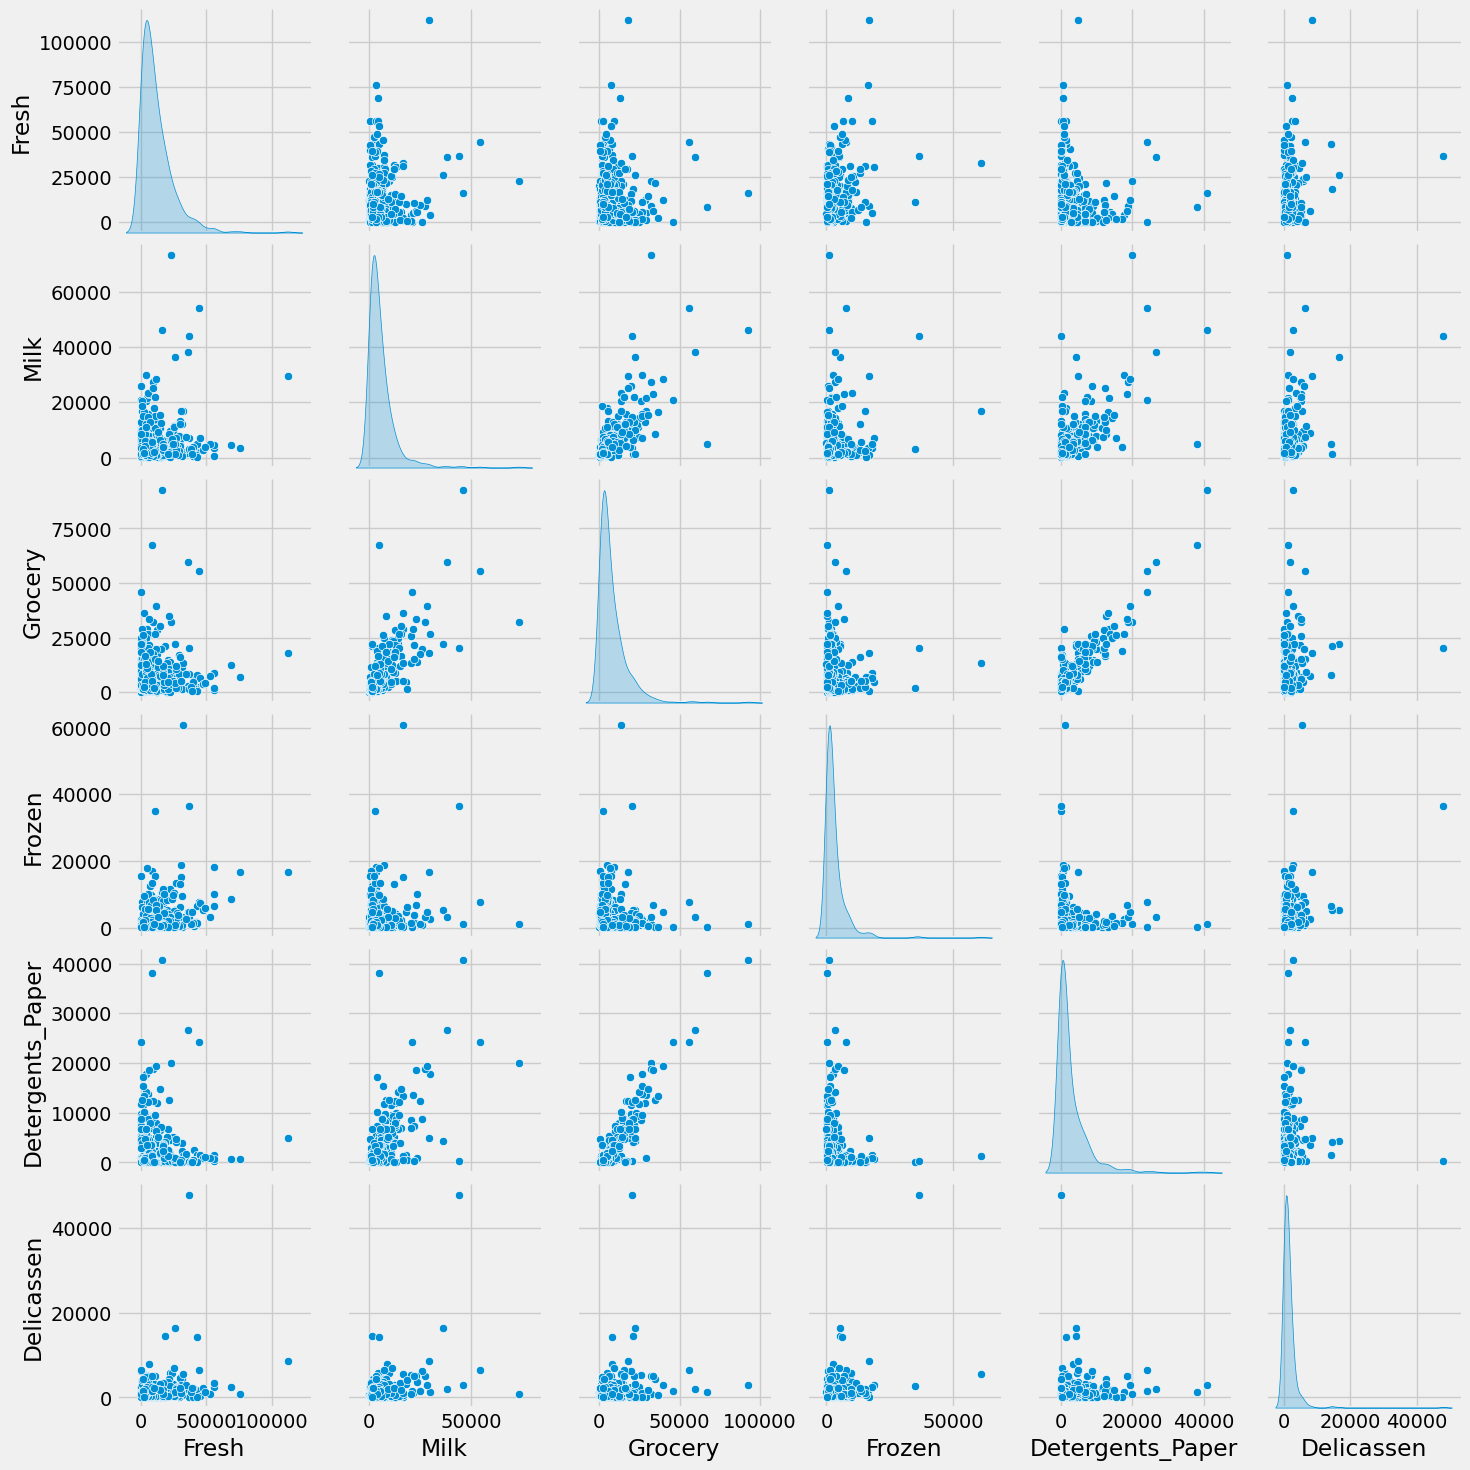

In [182]:
import seaborn as sns
sns.pairplot(data, kind='scatter', diag_kind='kde')
plt.show()

In [183]:
handle_outliers(data,'Fresh')
handle_outliers(data,'Milk')
handle_outliers(data,'Grocery')
handle_outliers(data,'Frozen')
handle_outliers(data,'Detergents_Paper')
handle_outliers(data,'Delicassen')

Done-->
Done-->
Done-->
Done-->
Done-->
Done-->


C:\Users\esoft\AppData\Local\Temp\ipykernel_1164\25987764.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '37642.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i,column]=upper_bound
C:\Users\esoft\AppData\Local\Temp\ipykernel_1164\25987764.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15676.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i,column]=upper_bound
C:\Users\esoft\AppData\Local\Temp\ipykernel_1164\25987764.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '23409.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i,column]=upper_bound
C:\Users\esoft\AppData\Local\Temp\ipykernel_1164\25987764.p

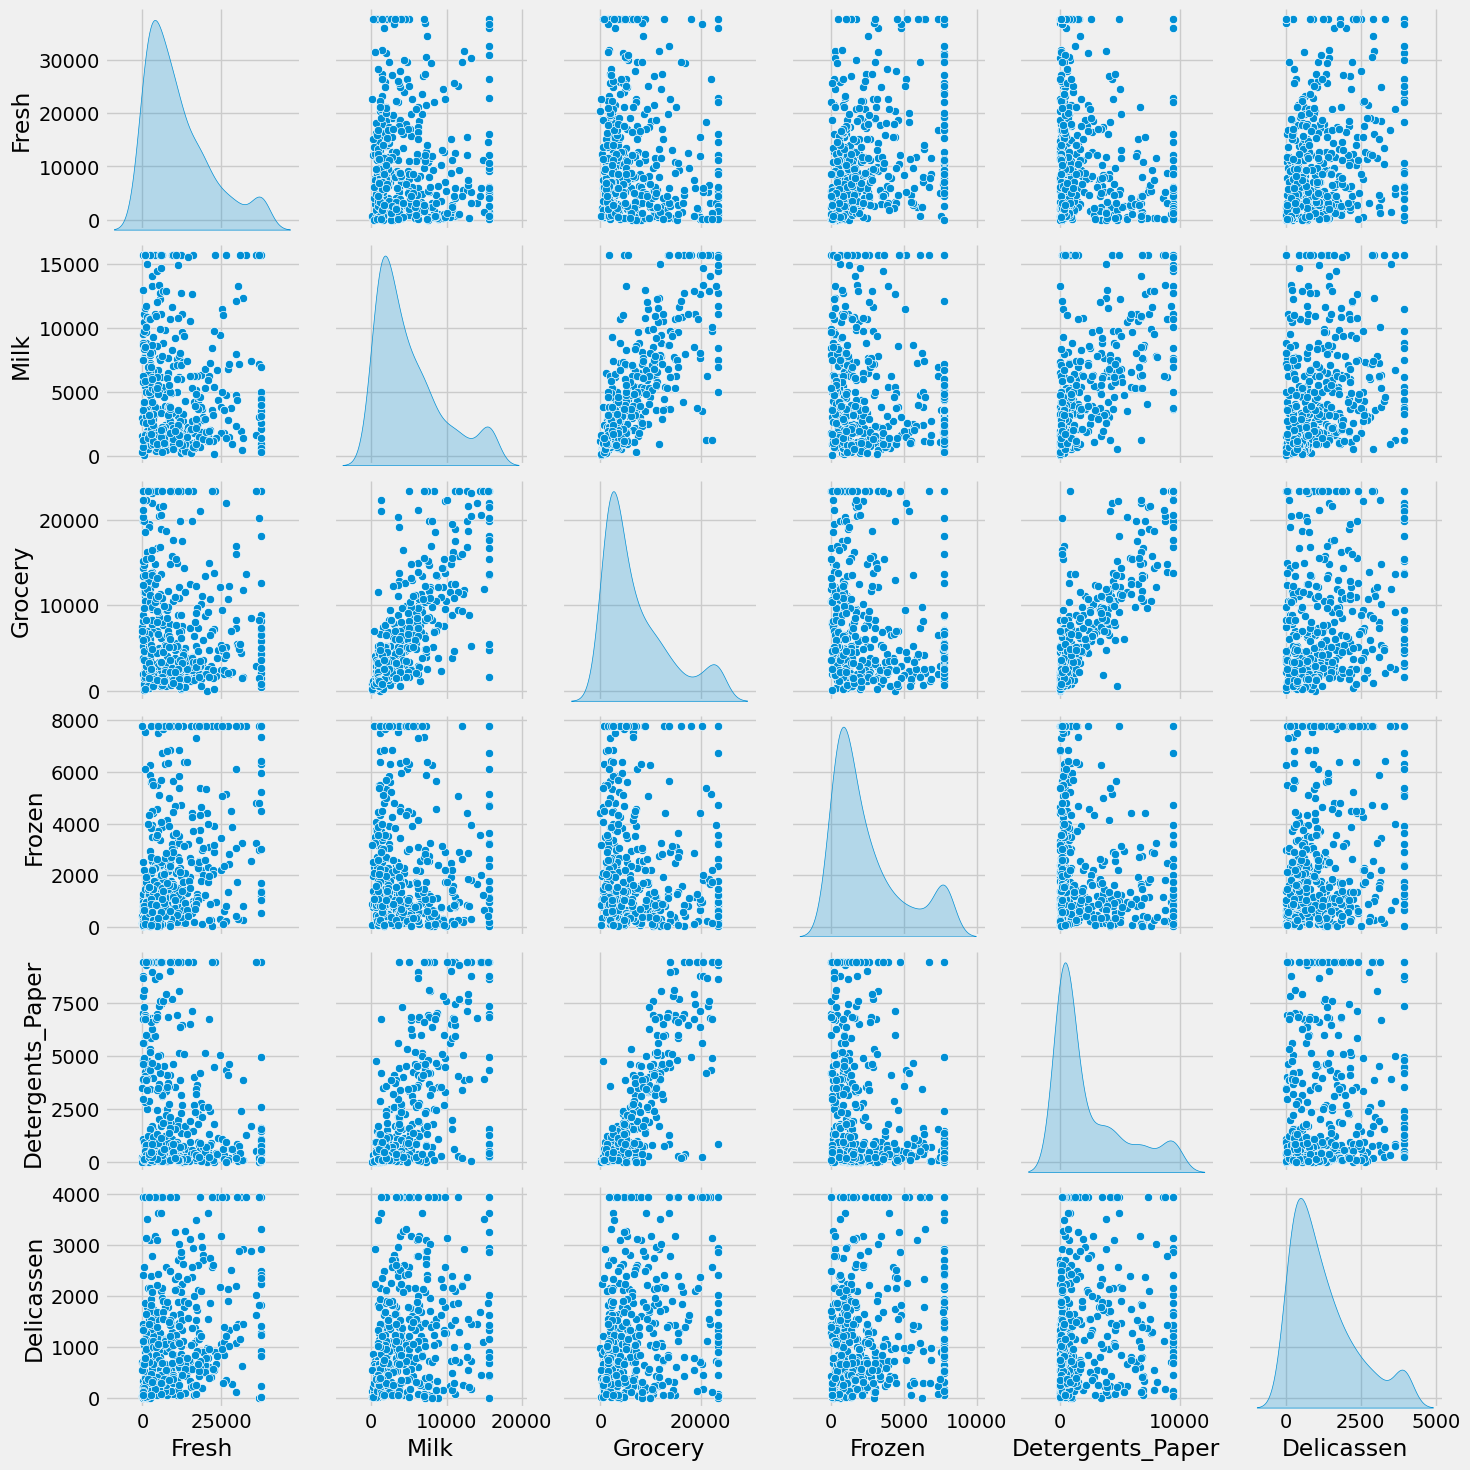

In [155]:
sns.pairplot(data, kind='scatter', diag_kind='kde')
plt.show()

In [184]:
X=data.iloc[::].values
print(X.shape)
X

(440, 6)


array([[12669.   ,  9656.   ,  7561.   ,   214.   ,  2674.   ,  1338.   ],
       [ 7057.   ,  9810.   ,  9568.   ,  1762.   ,  3293.   ,  1776.   ],
       [ 6353.   ,  8808.   ,  7684.   ,  2405.   ,  3516.   ,  3938.25 ],
       ...,
       [14531.   , 15488.   , 23409.875,   437.   ,  9419.875,  1867.   ],
       [10290.   ,  1981.   ,  2232.   ,  1038.   ,   168.   ,  2125.   ],
       [ 2787.   ,  1698.   ,  2510.   ,    65.   ,   477.   ,    52.   ]])

In [185]:
# before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same.
# Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the
# variables with a higher magnitude like Fresh or Milk

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.336506,0.614616,0.322897,0.024396,0.283640,0.339241
1,0.187408,0.624475,0.408641,0.224209,0.349373,0.450543
2,0.168705,0.560331,0.328151,0.307206,0.373054,1.000000
3,0.352340,0.073042,0.180203,0.823389,0.053521,0.453593
4,0.600748,0.342805,0.307388,0.502114,0.188385,1.000000


import scipy.cluster.hierarchy as shc: This line imports the hierarchy submodule from the cluster module within the scipy library. This submodule provides functions for performing hierarchical clustering, which is a technique for grouping data points into a tree-like structure based on their similarities.


shc.linkage(data_scaled, method='ward'): This part calculates a distance matrix using the specified linkage method 
(Ward's method in this case). The distance matrix represents the pairwise distances between data points 
in the data_scaled variable, which likely contains your scaled data for clustering. Ward's method 
aims to minimize the variance within each cluster.

shc.dendrogram(result): This part takes the result of the linkage calculation (result) and creates a visual 
representation of the hierarchical clustering process in the form of a dendrogram. The dendrogram shows how data 



The additional line plt.axhline(y=6, color='r', linestyle='--') in the code creates a horizontal line on the dendrogram plot. Here's a breakdown of the arguments:

y=6: This specifies the y-coordinate (vertical position) of the line. 
In this case, it will be drawn at y=6.

color='r': This sets the color of the line to red.

linestyle='--': This sets the line style to dashed.


Text(0, 0.5, 'Euclidean distance')

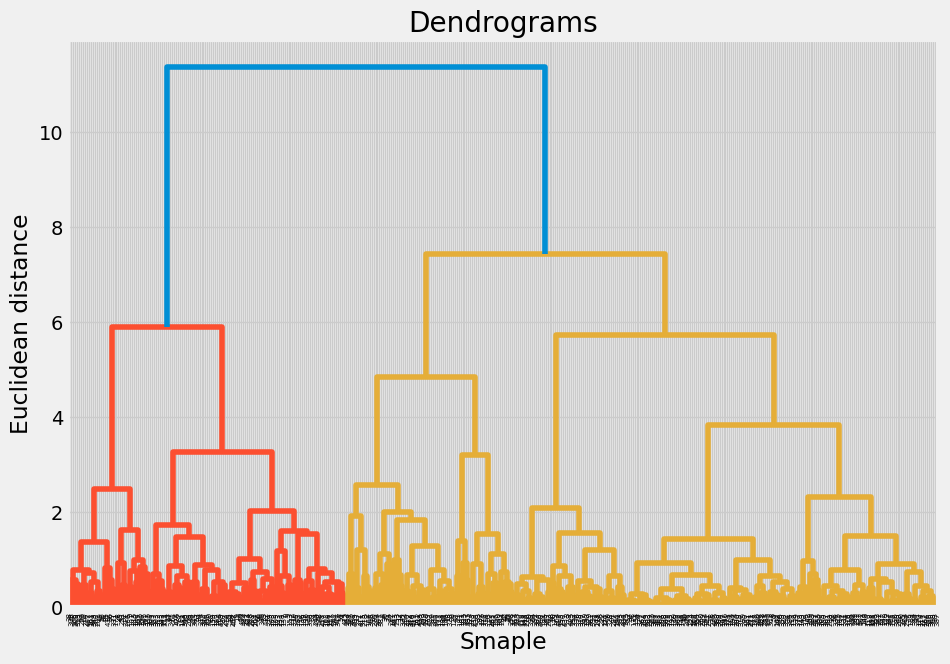

In [186]:
# The x-axis contains the samples and y-axis represents the distance between these samples. 
# The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.xlabel('Smaple')
plt.ylabel("Euclidean distance")

In [187]:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
labels = cluster.fit_predict(data_scaled)

C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [188]:
labels

array([1, 1, 2, 0, 2, 1, 1, 1, 0, 3, 1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0,
       2, 2, 2, 1, 0, 0, 3, 0, 2, 0, 0, 2, 0, 1, 2, 1, 3, 2, 2, 2, 1, 3,
       1, 3, 3, 2, 1, 3, 0, 1, 0, 1, 0, 0, 3, 1, 0, 1, 1, 3, 1, 1, 0, 3,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 3, 2,
       0, 2, 0, 0, 3, 2, 1, 0, 1, 0, 0, 0, 3, 3, 1, 2, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 3, 3, 0, 1, 1, 1, 2, 0, 3, 1, 3, 2, 0, 0, 0, 1, 3, 1, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 3, 3, 2, 0, 0, 3, 0, 1, 1, 3, 2, 3, 2, 1, 1, 3, 3, 0, 2, 0,
       0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 1, 3, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 2, 3, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 2,

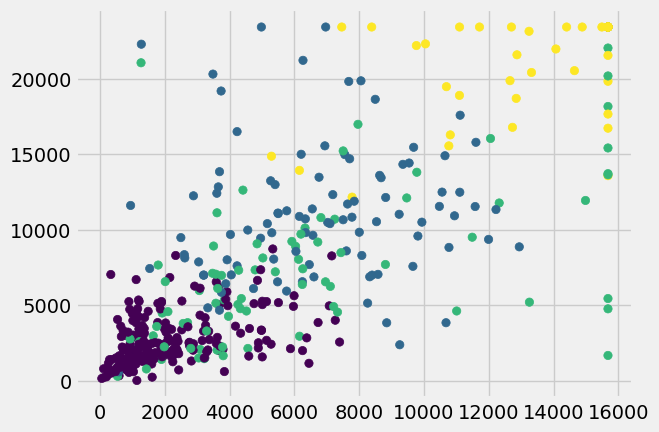

In [189]:


plt.scatter(data['Milk'], data['Grocery'], c=cluster.labels_)

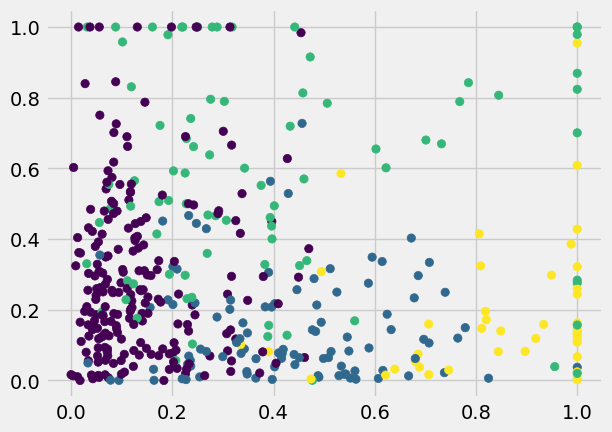

In [199]:

plt.scatter(data_scaled['Milk'], data_scaled['Fresh'], c=cluster.labels_)

KMEANS

In [191]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(X)
  wcss.append(model.inertia_)

C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

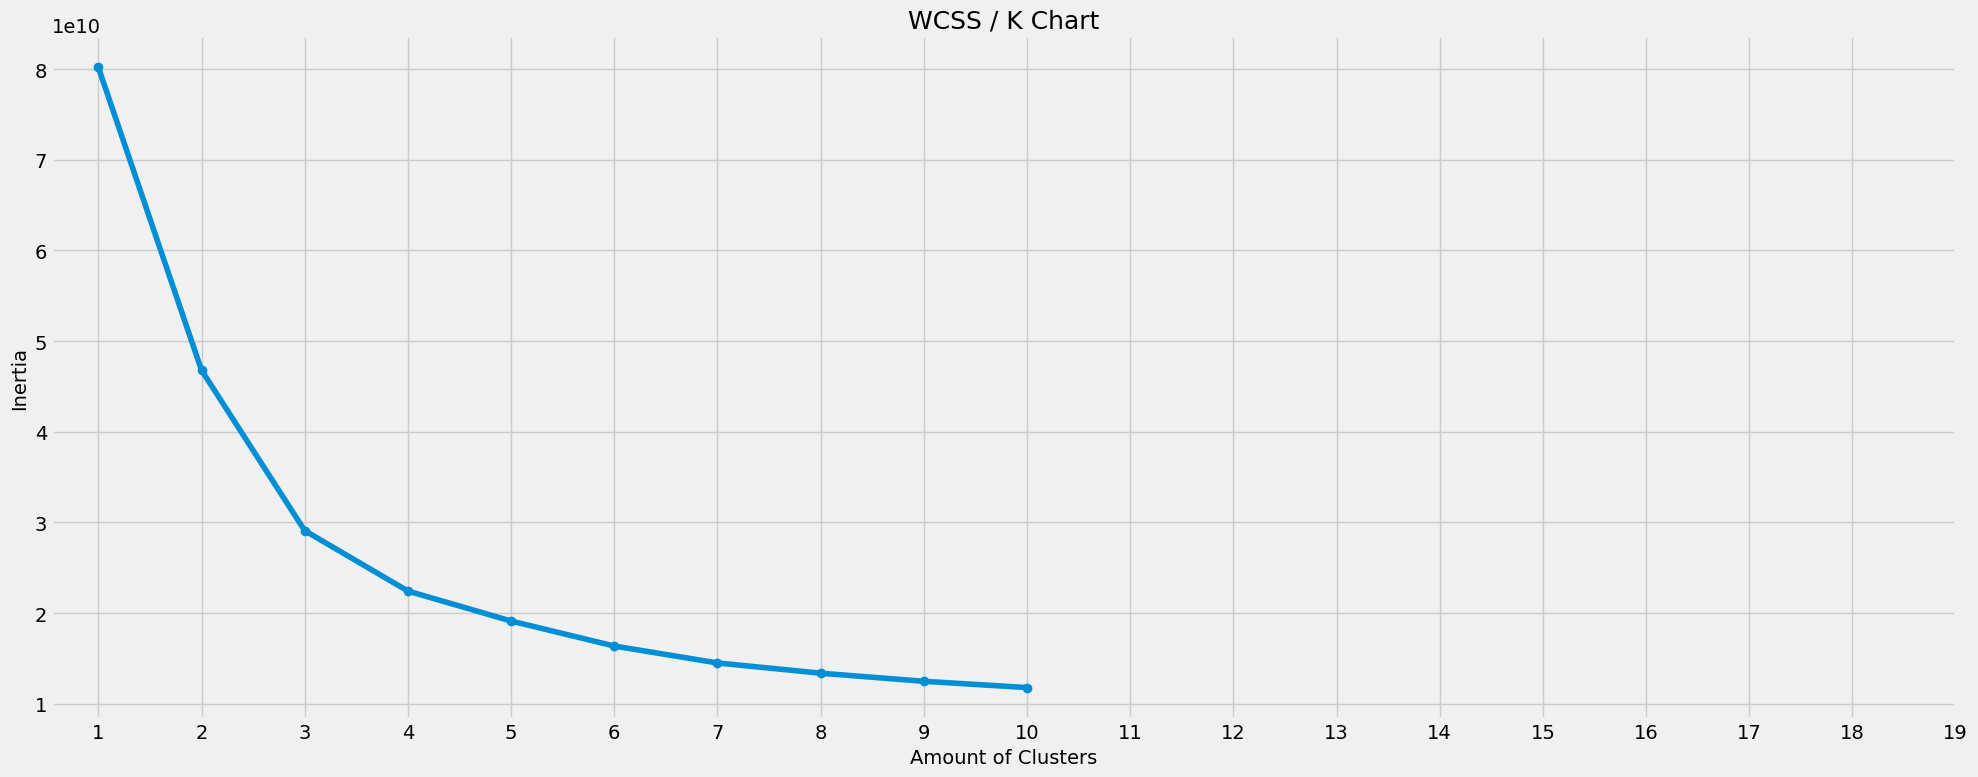

In [192]:
plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,11),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [193]:
# Silhouette Coefficients by using the same dataset



# A list holds the silhouette coefficients for each k
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
   
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

In [194]:
  # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data_scaled)
        score = silhouette_score(data_scaled, kmeans.labels_)
        silhouette_coefficients.append(score)

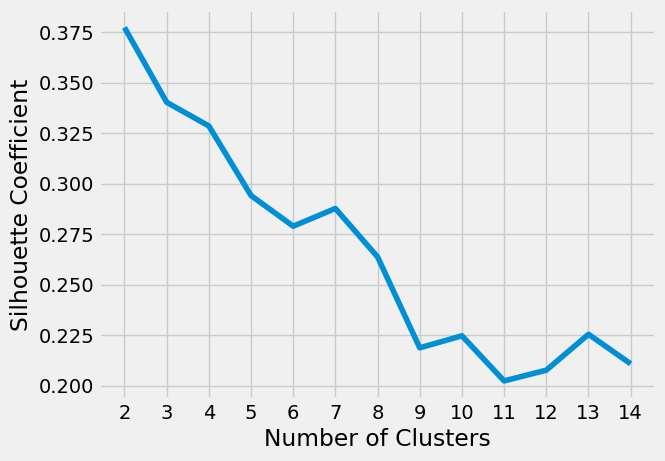

In [195]:
# Plotting the average silhouette scores for each k shows that the best choice for k is 3 since it has the maximum score        
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()    

C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (15) than needed (5), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (15) than needed (5), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1615: UserWarning: The markers list has more values (15) than needed (5), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\

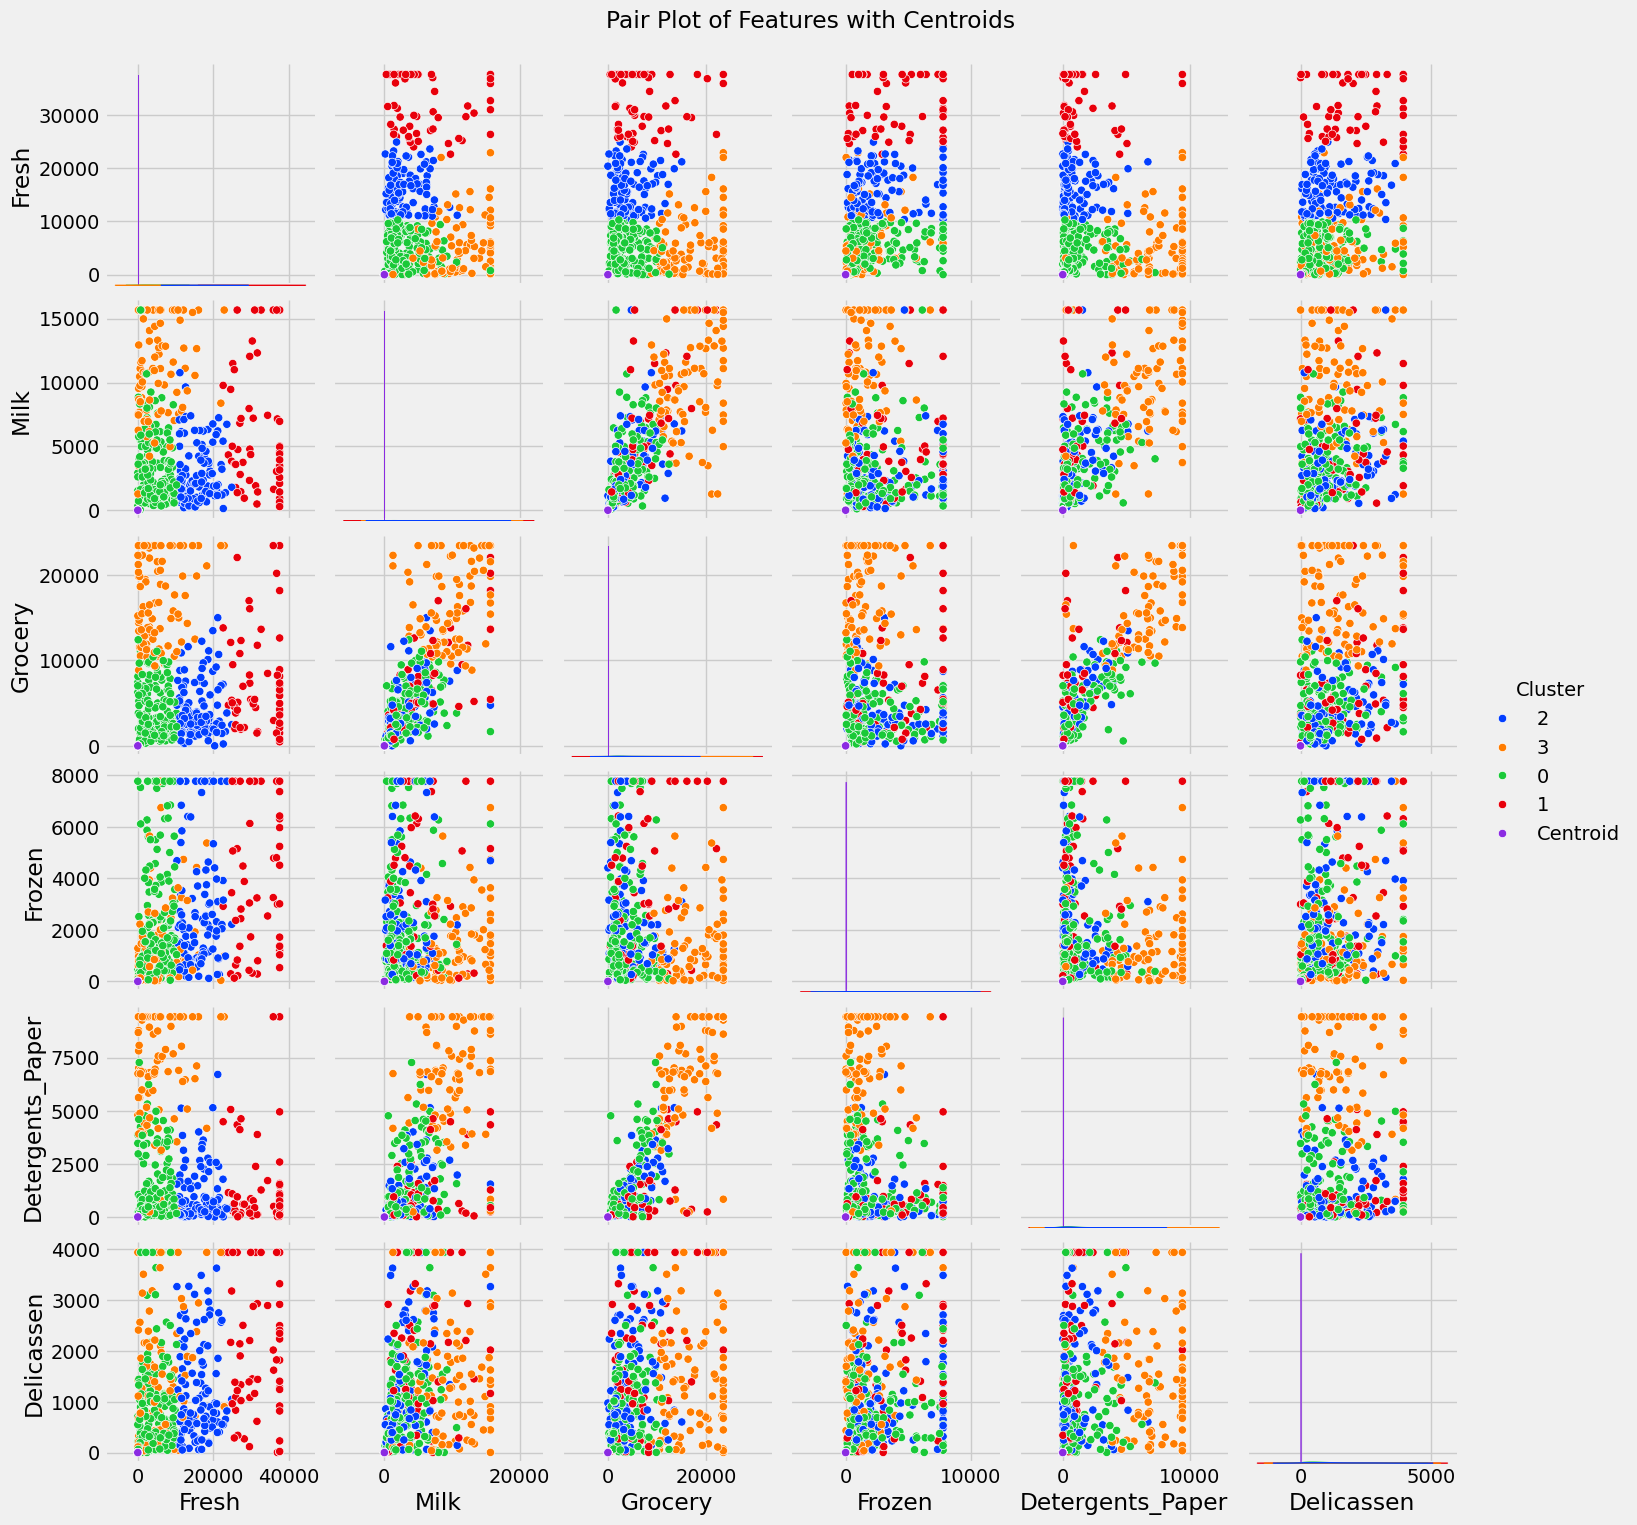

In [196]:
features = data.columns
df = pd.DataFrame(X, columns=features)

df['Cluster'] = y_kmeans

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids_df['Cluster'] = ['Centroid'] * kmeans.n_clusters

combined_df = pd.concat([df, centroids_df], ignore_index=True)

sns.pairplot(combined_df, hue='Cluster', palette='bright', markers=['o']*kmeans.n_clusters + ['X'])

plt.suptitle('Pair Plot of Features with Centroids', y=1.02)
plt.show()